## Goal: Visualizaing 784 Dimension data ( By using Dimensionality reduction)

#### Methods we are going to use for Dimensionality Reduction:
1) PCA    
2) t-SNE ( t-Distributed stochastic neighbourhood embedding)

You can get the dataset here: (https://www.kaggle.com/c/digit-recognizer/data)

In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
## Dataset that we are going to use
mnist_data=pd.read_csv('/Users/dollymoulekhi/Desktop/digit-recognizer/train.csv')
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# save the labels into a variable l.
l = mnist_data['label']

# Drop the label feature and store the pixel data in d.
d = mnist_data.drop("label",axis=1)

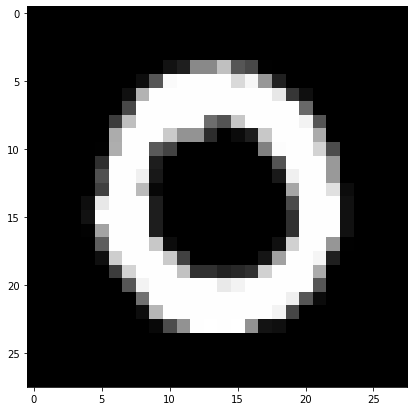

0


In [4]:
# display or plot a number.

plt.figure(figsize=(7,7))
idx = 1

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

## 2D Visualization using PCA ( manually Doing Dimensionality reduction )

### PCA(Principal Component Analysis): 

**PCA dimensionality reduction is done by seleting or projecting data points on those axis which is having maximum variance,or by slecting those features which is having maximum variance, its the reduction of dimension while preserving maximum variance.**


**Steps to follow and their mathematical explanation:**

**1) Co-Variance Matrix**

```
1) Standarazation of data: We are standardizing the data so the mean of every column will be 0 and standard deviation is 1

2) Co-variance Matrix creation
Formula for Co-Variance: COV(f1,f2)= 1/n *sum From i=1 to n ((xi1-mean of x1)*(xi2-mean of x2)

Since data is standarized so mean of x1= mean of x2=0

==>COV(f1,f2)=1/n*sum From i=1 to n (xi1)*(xi2)*
==> 1/n*sum FRom i=1 to n (xi1 dot product xi2)

Instead of dot product we can write 1/n(xi1)^T * (xi2)

==>COV(f1,f2)=1/n(xi1)^T * (xi2)


```

**2) Dimensionality Reduction: 784 Dim - 2 Dim**

```

1) We want to reduce from 784 D to 2D for doing further visualization.
2) We will choose Dimension with maximum spread(for loosing the least variance/information of dataset).
3) Information of maximum spread is represented by the top  eigen values of covariance matrix.

```




In [5]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(42000, 784)


In [6]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [7]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
print(values)

#vectors[:,0] represents the eigen vector corresponding to the 2nd eigen value.(First column in the vectors matrix)
#vectors[:,1] represents the eigen vector correspondign to the 1st eigen value.(Second column in the vectors matrix)

#Note : Eigen values are arranged in ascending order so the Eigen vectors too.


# converting the eigen vectors into (2,d) shape for ease of computation which we do it later.
vector = vectors.T

print("Updated shape of eigen vectors = ",vector.shape)
# Here, vectors[0] represent the eigen vector corresponding to the 2nd eigen value.
# Here, vectors[1] represent the eigen vector corresponding to the 1st eigen value.


#For sanity check.
print((vector[0] == vectors[:,0]).all())
print((vector[1] == vectors[:,1]).all())

#Now, we need to swap the rows of the vector matrix such that the first row corresponds to the eigen vector 
#with the largest eigen value and the second row corresponds to the eigen vector with the second largest eigen value.

vector[[0,1]]=vector[[1,0]]


Shape of eigen vectors =  (784, 2)
[1222652.44613786 1709211.41082575]
Updated shape of eigen vectors =  (2, 784)
True
True


In [8]:
# projecting the original data onto the eigen basis.
#( projecting my original data in the direction of maximum eigen values)
# Basically, we form a matrix with the eigen vectors in row order. Then, we do a matrix-vector multiplication
#between the matrix we formed and all the data vectors.

import matplotlib.pyplot as plt

## projection of xi on u1(Or in the direction of u1): u1^T * xi
new_coordinates = np.matmul(vector, sample_data.T)


print (" resultant new data points' shape ", vector.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)


 resultant new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [10]:
import pandas as pd

labels = l
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.140478      -5.226445    1.0
1      19.292332       6.032996    0.0
2      -7.644503      -1.705813    1.0
3      -0.474207       5.836139    4.0
4      26.559574       6.024818    0.0


/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


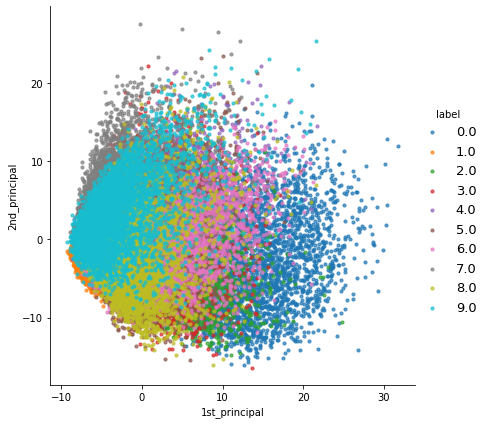

In [12]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal',s=10,alpha=0.7).add_legend(fontsize=20,prop={'size': 13})
plt.show()



### Conclusion:
```
1) We have reduced 784 Dimensional data to 2 Dimensional data but we are not able to seprate the different numbers as we can see in visualization.
2) So instead of using PCA we will try another approch called as t-SNE.

```

## PCA using Scikit-Learn

In [22]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [23]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


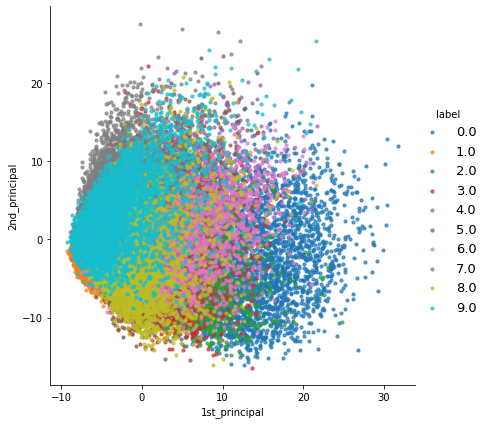

In [24]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal',s=10,alpha=0.7)
             .add_legend(fontsize=20,prop={'size': 13})
plt.show()


## PCA for dimensionality redcution (not for visualization)

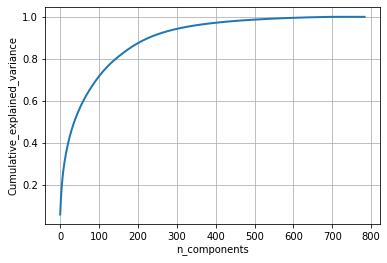

In [26]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)


## pca.explained_variance: lambda i
## np.sum(pca.explained_variance_): summation of lambda i
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_); 
# lambda i/(summation of lambda i)

cum_var_explained = np.cumsum(percentage_var_explained) 
# lambda 1/( sum of all lambda values), (lambda 1+ lambda 2)/sum of all lambda 

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

## t-SNE using Scikit-Learn

### t-SNE (t-Distrbuted Stochastic Neighbourhood Embedding):

```
It prserve the local-struture of data.In simpler terms it will preserve nearest 5 or 10 points structure according to the number of points specified by us.
```


/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


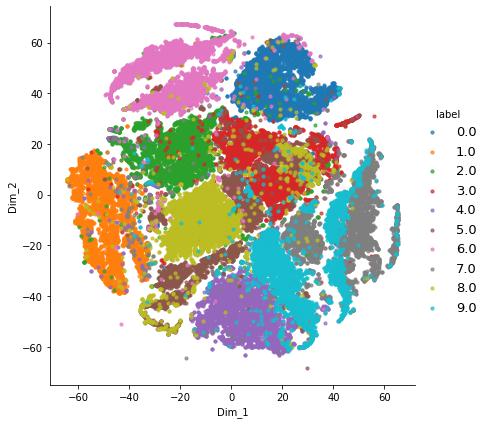

In [35]:
# TSNE

from sklearn.manifold import TSNE

data_1000 = standardized_data
labels_1000 = labels

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2',s=10,alpha=0.7)
            .add_legend(fontsize=20,prop={'size': 13})
plt.show()


/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


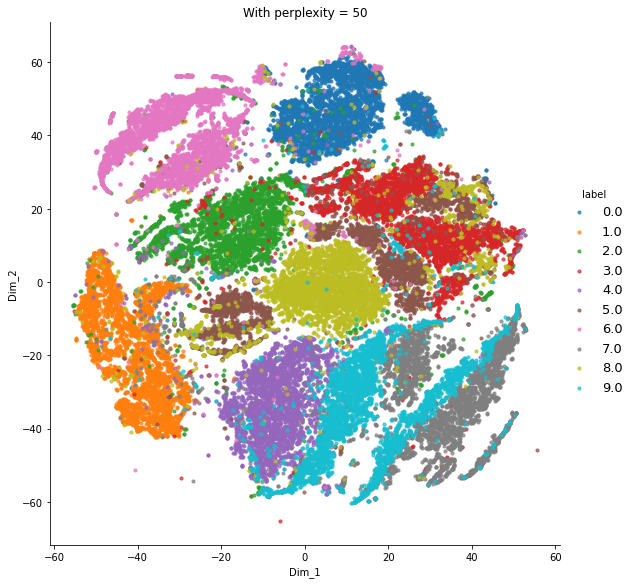

In [36]:

model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=8).map(plt.scatter, 'Dim_1', 'Dim_2',s=10,alpha=0.7)
            .add_legend(fontsize=20,prop={'size': 13})
plt.title('With perplexity = 50')
plt.show()


/opt/miniconda3/envs/mlenv/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

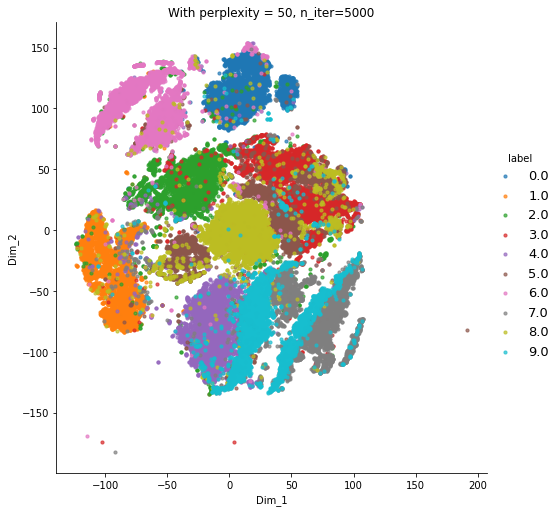

In [124]:

model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
plt.figure(figsize=(20, 10))

sn.FacetGrid(tsne_df, hue="label", size=7).map(plt.scatter, 'Dim_1', 'Dim_2',s=10,alpha=0.7)
            .add_legend(fontsize=20,prop={'size': 13})
plt.title('With perplexity = 50, n_iter=5000')
plt.show()



### Conclusion:
    
t-SNE is an advance technique of dimensionality reduction which preserves the local-structure of data by maintaining the distance relation among nearest neighbour of a points and hence gives very good result compared to PCA. 